In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Scientist']

In [3]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785689,Data Scientist,Data Scientist -50065385,Israel,via LinkedIn,Full-time,False,Israel,2023-01-30 06:36:07,False,False,Israel,None,NaN,NaN,Phoenix Holdings קבוצת הפניקס,[sql],{'programming': ['sql']}
785690,Data Scientist,Customer Master Data Specialist,"Makati, Metro Manila, Philippines",via Trabajo.org,Full-time,False,Philippines,2023-01-18 06:16:42,False,False,Philippines,None,NaN,NaN,Henkel,"[vba, sap, word, powerpoint, excel]","{'analyst_tools': ['sap', 'word', 'powerpoint'..."
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,"[python, matlab, r]","{'programming': ['python', 'matlab', 'r']}"
785697,Data Scientist,Data Science Python modelling,"Pune, Maharashtra, India",via LinkedIn,Full-time,False,India,2023-01-16 06:12:27,False,False,India,None,NaN,NaN,Live Connections,"[python, sql, r, power bi, tableau, word, exce...","{'analyst_tools': ['power bi', 'tableau', 'wor..."


In [5]:
df_exploded = df.explode('job_skills')

df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",sql,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",python,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",r,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,bigquery,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gdpr,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,git,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gitlab,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."


In [6]:
df_exploded.groupby('job_skills').size()

job_skills
airflow       3915
airtable        65
alteryx       2068
angular        736
angular.js      12
              ... 
wrike            8
wsl             31
xamarin          5
yarn           249
zoom           361
Length: 237, dtype: int64

In [8]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats

,skill_count,median_salary
job_skills,,
airflow,3915,157000.0
airtable,65,215500.0
alteryx,2068,115000.0
angular,736,93500.0
angular.js,12,NaN
...,...,...
wrike,8,NaN
wsl,31,NaN
xamarin,5,NaN


In [9]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

In [10]:
skill_stats

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


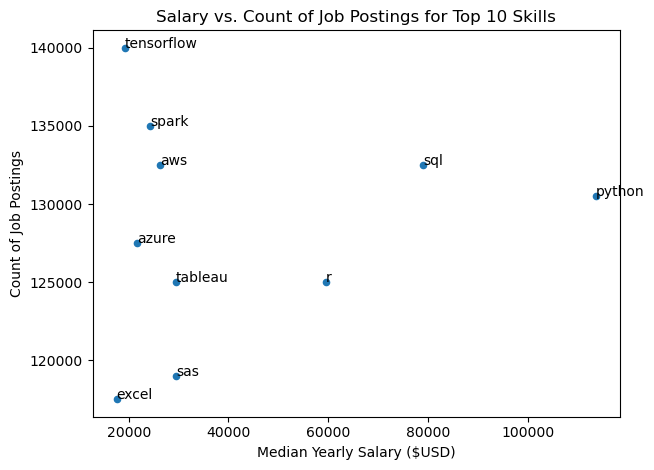

In [14]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.xlabel('Median Yearly Salary ($USD)')
plt.ylabel('Count of Job Postings')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()